In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import os
import tensorflow as tf
from lib.methods import *
from lib.models import *
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import preprocessing
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing import image_dataset_from_directory

2023-01-23 08:43:11.113966: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-01-23 08:43:14.985099: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-01-23 08:43:15.068062: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:02:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.6705GHz coreCount: 28 deviceMemorySize: 10.91GiB deviceMemoryBandwidth: 451.17GiB/s
2023-01-23 08:43:15.068539: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:81:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.6705GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2023-01-23 08:43:15.068587: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic libra

In [2]:
!pip install scikit-learn 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 37.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 19.7 MB/s eta 0:00:0000:0100:01


# Loading SIPI Dataset

SIPI dataset was preprocessed using prepare_dataset notebook, so these three folders already contain Detritus/Non-Detritus images.

Training: 70%
Validation: 15%
Testing: 15%

In [4]:
DatasetName = '../../Detritus/Dataset-Detritus-Bubble'

train_dir = DatasetName+'/train'
validation_dir =  DatasetName+'/val'
test_dir = DatasetName+'/test'

test_all_class_dir = '../../Detritus/Dataset-Detritus-Bubble/test'
train_all_class_dir = 'Dataset-Detritus-Bubble/train'
val_all_class_dir = '../../Detritus/Dataset-Detritus-Bubble/val'

In [5]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

The three datasets are loaded using keras preprocessing method *image_dataset_from_directory*. Both the batch size and the image size hyperparameters where tested using different values. 

In [6]:
train_dataset = image_dataset_from_directory(train_dir,
shuffle=False,
batch_size=BATCH_SIZE,
image_size=IMG_SIZE)

Found 38391 files belonging to 2 classes.


In [7]:
validation_dataset = image_dataset_from_directory(validation_dir,
shuffle=False,
batch_size=BATCH_SIZE,
image_size=IMG_SIZE)

test_dataset = image_dataset_from_directory(test_dir,
shuffle=False,
batch_size=BATCH_SIZE,
image_size=IMG_SIZE)

Found 8226 files belonging to 2 classes.
Found 8227 files belonging to 2 classes.


In [8]:
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(test_all_class_dir,
shuffle=False,
batch_size=BATCH_SIZE, target_size=IMG_SIZE)

Found 8227 images belonging to 2 classes.


In [9]:
validation_generator = ImageDataGenerator()
validation_data_generator = test_generator.flow_from_directory(val_all_class_dir,
shuffle=False,
batch_size=BATCH_SIZE, target_size=IMG_SIZE)

Found 8226 images belonging to 2 classes.


# Load models

## Custom CNN model

Training with Data Augmentation

In [10]:
model_A = get_model_A(0.0, True, 0.0)

lr = 0.001
model_A.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_A.load_weights('.model_a')

test_accuracy(model_A, test_dataset)
# print_tsne(model_A, test_dataset, 2500)


2023-01-23 08:43:25.373061: W tensorflow/core/util/tensor_slice_reader.cc:95] Could not open .model_a: Data loss: file is too short to be an sstable: perhaps your file is in a different file format and you need to use a different restore operator?
2023-01-23 08:43:25.519376: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-01-23 08:43:25.541040: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2100035000 Hz
2023-01-23 08:43:25.892472: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-01-23 08:43:30.896727: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8100
2023-01-23 08:43:38.821104: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11


  1/258 [..............................] - ETA: 1:43:56 - loss: 1.3945 - accuracy: 0.4688

2023-01-23 08:43:49.577338: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


258/258 [==============================] - 27s 11ms/step - loss: 0.1574 - accuracy: 0.9392
Test accuracy : 0.9392244815826416


0.9392244815826416

In [11]:
model_B = get_model_B(0.0, True, 0.0)

lr = 0.001
model_B.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_B.load_weights('.model_b')

test_accuracy(model_B, test_dataset)
# print_tsne(model_B, test_dataset, 2500)


2023-01-23 08:43:52.668209: W tensorflow/core/util/tensor_slice_reader.cc:95] Could not open .model_b: Data loss: file is too short to be an sstable: perhaps your file is in a different file format and you need to use a different restore operator?


258/258 [==============================] - 3s 10ms/step - loss: 0.1408 - accuracy: 0.9435
Test accuracy : 0.9434787631034851


0.9434787631034851

In [12]:
def get_mobile_net(drop_value=0.0, data_aug=False, l2_reg=0.0):
    inputs = tf.keras.Input(shape=(160, 160, 3))
    
    if data_aug:
        dag = data_augmentation(inputs)
        processed_input =  tf.keras.applications.mobilenet_v2.preprocess_input(dag)
    else:
        processed_input =  tf.keras.applications.mobilenet_v2.preprocess_input(inputs)
    
    base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights=None)
    
    x = base_model(processed_input)
    
    global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
    
    x = global_average_layer(x)
    
    if drop_value > 0:
        x = keras.layers.Dropout(drop_value)(x)
    
    if l2_reg > 0:
        x = keras.layers.Dense(1, kernel_regularizer=regularizers.l2(l2_reg),
                bias_regularizer=regularizers.l2(l2_reg),
                activity_regularizer=regularizers.l2(l2_reg))(x)
    else:
        x = keras.layers.Dense(1)(x)
    return keras.Model(inputs, x)

## MobileNetV2 Model From Scratch

In [13]:
lr = 0.0001
mobileNetModelSc = get_mobile_net(0.0, True, 0.0)
mobileNetModelSc.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

mobileNetModelSc.load_weights('.mobile_net_scratch')

test_accuracy(mobileNetModelSc, test_dataset)
# print_tsne(mobileNetModelSc, test_dataset, 2500)

2023-01-23 08:43:56.916626: W tensorflow/core/util/tensor_slice_reader.cc:95] Could not open .mobile_net_scratch: Data loss: file is too short to be an sstable: perhaps your file is in a different file format and you need to use a different restore operator?


258/258 [==============================] - 7s 23ms/step - loss: 0.1297 - accuracy: 0.9542
Test accuracy : 0.9541752934455872


0.9541752934455872

## DenseNet model

In [14]:
def get_dense_net(drop_value=0.0, data_aug=False, l2_reg=0.0):
    dense_base_model = tf.keras.applications.DenseNet201(input_shape=IMG_SHAPE,
                                                   include_top=False,
                                                   weights='imagenet')

    dense_base_model.trainable = False

    dense_preprocess_input = tf.keras.applications.densenet.preprocess_input
    dense_global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
    dense_prediction_layer = tf.keras.layers.Dense(1)

    dense_inputs = tf.keras.Input(shape=(160, 160, 3))
    if data_aug:
        dag = data_augmentation(dense_inputs)
        dense_x =  tf.keras.applications.densenet.preprocess_input(dag)
    else:
        dense_x =  tf.keras.applications.densenet.preprocess_input(dense_inputs)
    dense_x = dense_base_model(dense_x, training=False)
    dense_x = dense_global_average_layer(dense_x)
    if drop_value > 0:
        dense_x = keras.layers.Dropout(drop_value)(dense_x)
    dense_outputs = dense_prediction_layer(dense_x)
    dense_model = tf.keras.Model(dense_inputs, dense_outputs)
    return dense_base_model, dense_model

In [15]:
_, dense_model = get_dense_net(0.0, True, 0.0)

dense_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

dense_model.load_weights('.dense_net_ft_lr')

loss, accuracy = dense_model.evaluate(test_dataset)
print('Test accuracy :', accuracy)
    
# print_tsne(dense_model, test_dataset, 2500)

2023-01-23 08:44:11.726000: W tensorflow/core/util/tensor_slice_reader.cc:95] Could not open .dense_net_ft_lr: Data loss: file is too short to be an sstable: perhaps your file is in a different file format and you need to use a different restore operator?


258/258 [==============================] - 21s 63ms/step - loss: 0.1566 - accuracy: 0.9436
Test accuracy : 0.9436003565788269


## Inception Resnet

In [16]:
base_learning_rate = 0.0001
inception_resnet_base_model = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
inception_resnet_base_model.trainable = False
ir_preprocess_input = tf.keras.applications.inception_resnet_v2.preprocess_input
ir_global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
ir_prediction_layer = tf.keras.layers.Dense(1)

ir_inputs = tf.keras.Input(shape=(160, 160, 3))
dag = data_augmentation(ir_inputs)
ir_x =  tf.keras.applications.inception_resnet_v2.preprocess_input(dag)

ir_x = inception_resnet_base_model(ir_x, training=False)
ir_x = ir_global_average_layer(ir_x)
ir_outputs = ir_prediction_layer(ir_x)
ir_model = tf.keras.Model(ir_inputs, ir_outputs)
    
ir_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
          loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
          metrics=['accuracy'])

In [17]:
ir_model.load_weights('.inception_resnet_v2_lr')

loss, accuracy = ir_model.evaluate(test_dataset)
print('Test accuracy :', accuracy)
    
# print_tsne(ir_model, test_dataset, 2500)

2023-01-23 08:44:45.550106: W tensorflow/core/util/tensor_slice_reader.cc:95] Could not open .inception_resnet_v2_lr: Data loss: file is too short to be an sstable: perhaps your file is in a different file format and you need to use a different restore operator?


258/258 [==============================] - 22s 67ms/step - loss: 0.1680 - accuracy: 0.9347
Test accuracy : 0.934727132320404


# Analyze models

In [18]:
def show_confusion_matrix(model, generator):
    test_steps_per_epoch = np.math.ceil(generator.samples / generator.batch_size)
    predictions = model.predict(generator, steps=test_steps_per_epoch)
    
    y_pred = np.empty(len(predictions), dtype=float) 
    for i in range(len(predictions)):
        score = tf.nn.sigmoid(predictions[i])
        y_pred[i] = tf.where(score < 0.5, 0, 1)
    
    detr_list = ['LClass_Detritus', 'LClass_Bubbles', 'LClass_shadow']
    
    true_classes = generator.classes
    filepaths = generator.filepaths
    label_map = generator.class_indices
    index_map = {v: k for k, v in label_map.items()}
    
    class_labels = list(generator.class_indices.keys()) 
    correct =  {new_key: 0 for new_key in class_labels}
    incorrect = {new_key: 0 for new_key in class_labels}
    correct_files = []
    incorrect_files = []
    prob_map = {}
    
    for i in range(len(true_classes)):
        prob_map[filepaths[i]] = tf.nn.sigmoid(predictions[i]).numpy()
        if any(index_map[true_classes[i]] in s for s in detr_list):
            if (y_pred[i] == 0):
                correct[index_map[true_classes[i]]] += 1
                correct_files.append(filepaths[i])
            else:
                incorrect[index_map[true_classes[i]]] += 1
                incorrect_files.append(filepaths[i])
        else:
            if (y_pred[i] == 1):
                correct[index_map[true_classes[i]]] += 1
                correct_files.append(filepaths[i])
            else:
                incorrect[index_map[true_classes[i]]] += 1
                incorrect_files.append(filepaths[i])
    # report = metrics.classification_report(true_classes, y_pred, target_names=class_labels)
    for class_name in class_labels:
        corr = correct[class_name]
        incorr = incorrect[class_name]
        total = corr + incorr
        if (total == 0):
            corr_perc = 0
        else:
            corr_perc = corr/total
        print(class_name, corr, incorr, total, corr_perc)
    return correct, incorrect, correct_files, incorrect_files, prob_map

## Test generator

In [19]:
from sklearn import metrics

def show_report(model, generator):
    test_steps_per_epoch = np.math.ceil(generator.samples / generator.batch_size)
    predictions = model.predict(generator, steps=test_steps_per_epoch)
    
    y_pred = np.empty(len(predictions), dtype=float) 
    for i in range(len(predictions)):
        score = tf.nn.sigmoid(predictions[i])
        y_pred[i] = tf.where(score < 0.5, 0, 1)
    
    true_classes = generator.classes
    class_labels = list(generator.class_indices.keys())   
    report = metrics.classification_report(true_classes, y_pred, target_names=class_labels)
    print(report)

In [27]:
validation_data_generator.batch_size

32

In [28]:
show_report(model_B, validation_generator)
test_accuracy(model_B, test_dataset)

AttributeError: 'ImageDataGenerator' object has no attribute 'samples'

In [20]:
show_report(model_B, test_data_generator)
test_accuracy(model_B, test_dataset)

              precision    recall  f1-score   support

    Detritus       0.95      0.94      0.94      3804
       Other       0.95      0.96      0.95      4423

    accuracy                           0.95      8227
   macro avg       0.95      0.95      0.95      8227
weighted avg       0.95      0.95      0.95      8227

258/258 [==============================] - 14s 53ms/step - loss: 0.1408 - accuracy: 0.9435
Test accuracy : 0.9434787631034851


0.9434787631034851

In [ ]:
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)
predictions_A = model_A.predict(test_data_generator, steps=1)
predictions_B = model_B.predict(test_data_generator, steps=test_steps_per_epoch)


In [ ]:
predictions_A = model_A.predict(test_data_generator, steps=1)

In [ ]:
predictions_A

In [ ]:
len(predictions_B)

In [ ]:
show_report(model_A, validation_data_generator)
test_accuracy(model_A, test_dataset)

In [ ]:
show_report(mobileNetModelSc, validation_data_generator)
test_accuracy(mobileNetModelSc, test_dataset)

In [ ]:
show_report(dense_model, validation_data_generator)
test_accuracy(dense_model, test_dataset)

In [ ]:
show_report(ir_model, validation_data_generator)
test_accuracy(ir_model, test_dataset)

# Analyzing images

In [20]:
def get_tsne_coordinates(model, dataset, n_iter = 1000):
    new_ds = dataset
    
    x_dataset = []
    y_dataset = []
    
    for x, y in new_ds:
        x_dataset.append(x)
        y_dataset.append(y)
    
    
    small_dataset = np.concatenate(x_dataset)
    y_dataset = np.concatenate(y_dataset)
    
    results = model.predict(small_dataset)
    scores = tf.nn.sigmoid(results)
    labels = tf.where(scores < 0.5, 0, 1)
    
    colors = ['red', 'blue']
    classes = dataset.class_names
    filenames = dataset.file_paths
    file_path = {}
    
    model2 = tf.keras.Model(inputs=model.input, outputs=model.layers[-2].output)
    features = model2.predict(small_dataset)

    tsne = TSNE(n_components=2, verbose=1, perplexity=50
                , n_iter=n_iter)
    tsne_results = tsne.fit_transform(features)
    
    tx = tsne_results[:, 0]
    ty = tsne_results[:, 1]
    
    i = 0
    for f in filenames:
        file_path[f] = (tx[i], ty[i])
        i = i + 1
    fig2 = plt.figure(figsize=(16,16))
    fig2.suptitle('TSNE with prediction labels', fontsize=20)
    ax2 = fig2.add_subplot(111)
    for idx, c in enumerate(colors):
        indices = [i for i, l in enumerate(labels) if idx == l]
        current_tx = np.take(tx, indices)
        current_ty = np.take(ty, indices)
        ax2.scatter(current_tx, current_ty, c=c, label=classes[idx])
    
    ax2.legend(loc='best')
   
    fig = plt.figure(figsize=(16,16))
    fig.suptitle('TSNE with Ground Truth labels', fontsize=20)
    ax = fig.add_subplot(111)
    for idx, c in enumerate(colors):
        indices = [i for i, l in enumerate(y_dataset) if idx == l]
        current_tx = np.take(tx, indices)
        current_ty = np.take(ty, indices)
        ax.scatter(current_tx, current_ty, c=c, label=classes[idx])
    
    ax.legend(loc='best')
    return file_path

Detritus 3518 298 3816 0.9219077568134172
Other 4286 124 4410 0.9718820861678005
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 8226 samples in 0.006s...
[t-SNE] Computed neighbors for 8226 samples in 1.573s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8226
[t-SNE] Computed conditional probabilities for sample 2000 / 8226
[t-SNE] Computed conditional probabilities for sample 3000 / 8226
[t-SNE] Computed conditional probabilities for sample 4000 / 8226
[t-SNE] Computed conditional probabilities for sample 5000 / 8226
[t-SNE] Computed conditional probabilities for sample 6000 / 8226
[t-SNE] Computed conditional probabilities for sample 7000 / 8226
[t-SNE] Computed conditional probabilities for sample 8000 / 8226
[t-SNE] Computed conditional probabilities for sample 8226 / 8226
[t-SNE] Mean sigma: 0.752065
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.744743
[t-SNE] KL divergence after 2500 iterations: 1.351115


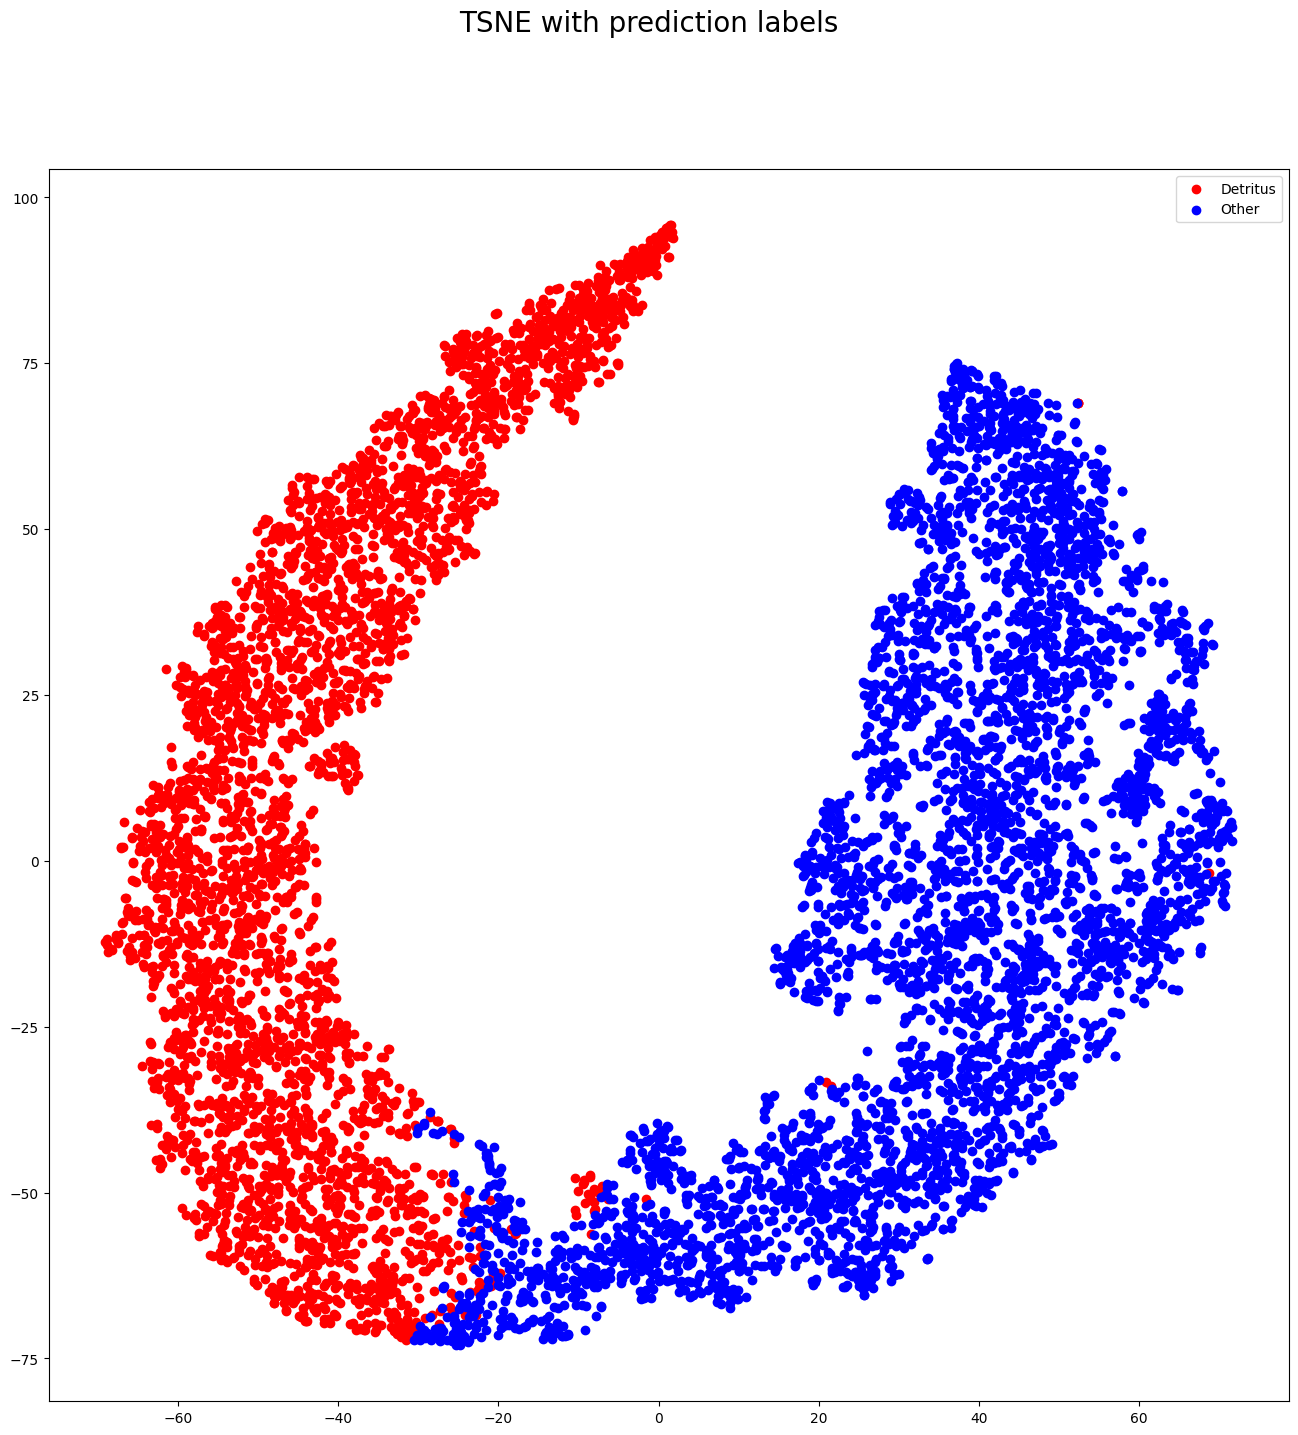

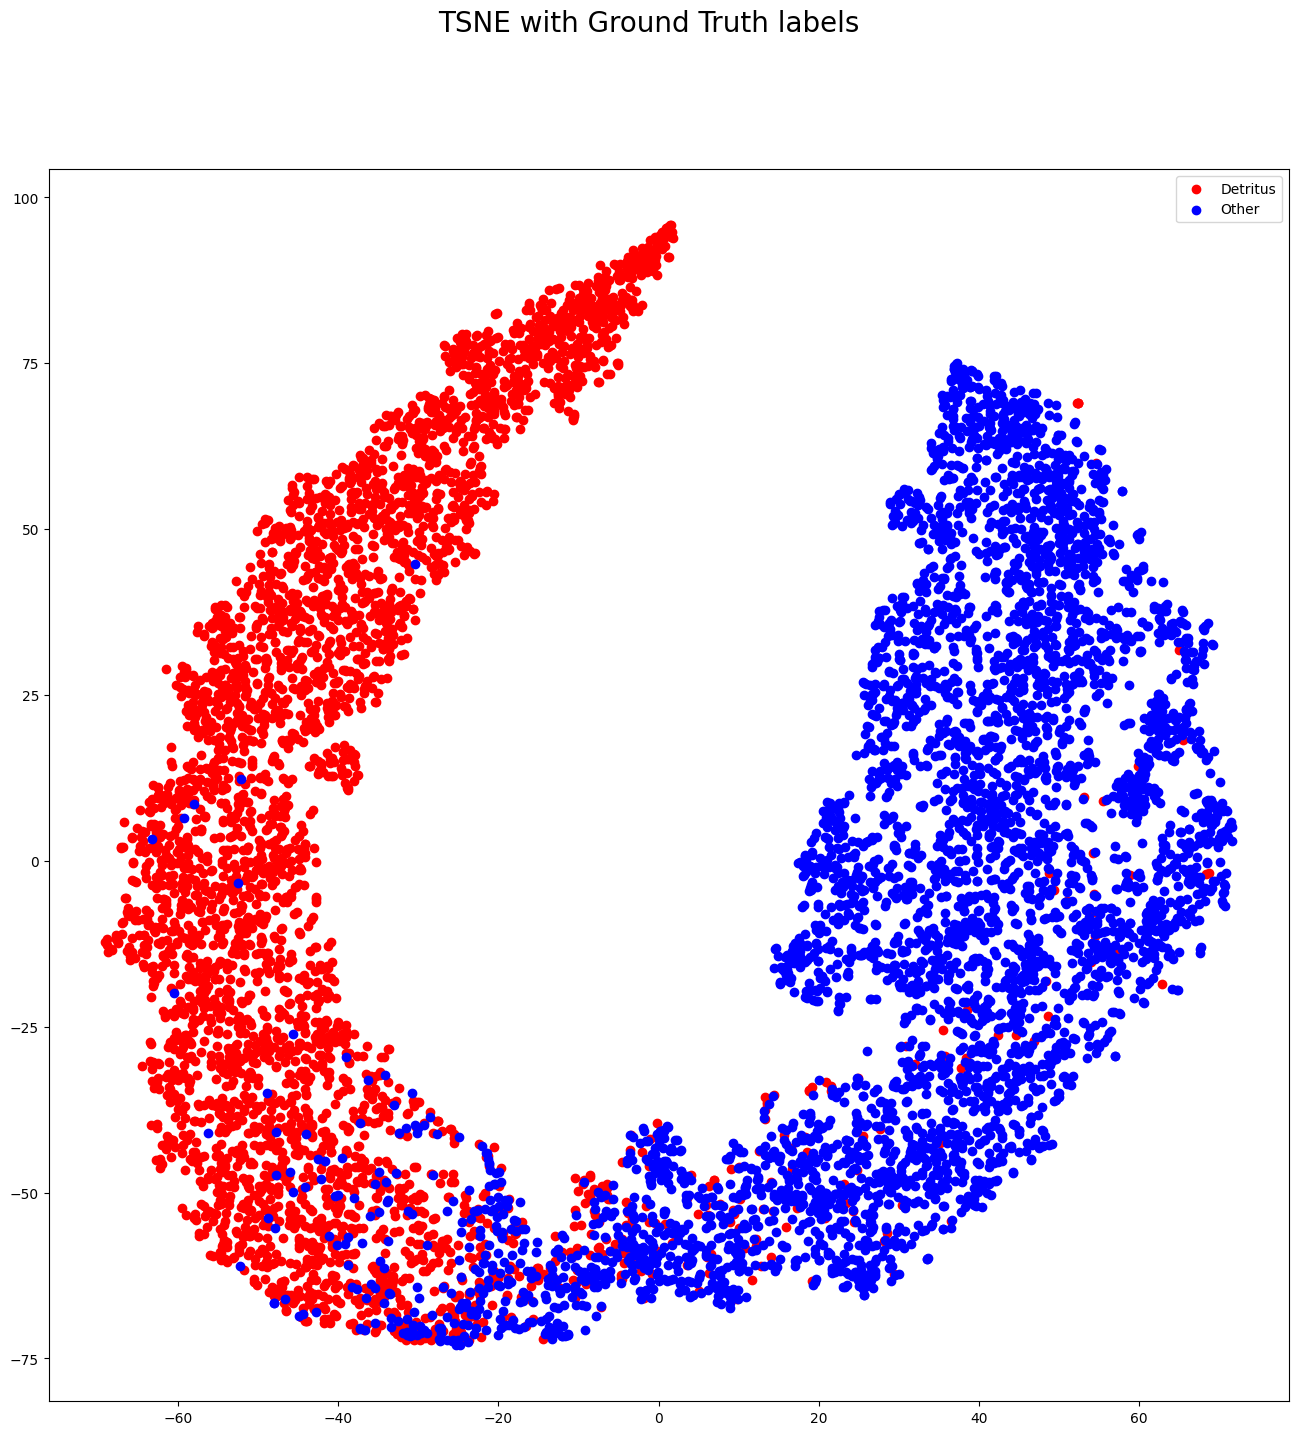

In [35]:
correct, incorrect, mobile_correct_files, mobile_incorrect_files, mobile_prob = show_confusion_matrix(mobileNetModelSc, validation_data_generator)
mobile_tsne_map = get_tsne_coordinates(mobileNetModelSc, validation_dataset, 2500)

Detritus 3586 230 3816 0.939727463312369
Other 4090 320 4410 0.927437641723356
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 8226 samples in 0.010s...
[t-SNE] Computed neighbors for 8226 samples in 2.076s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8226
[t-SNE] Computed conditional probabilities for sample 2000 / 8226
[t-SNE] Computed conditional probabilities for sample 3000 / 8226
[t-SNE] Computed conditional probabilities for sample 4000 / 8226
[t-SNE] Computed conditional probabilities for sample 5000 / 8226
[t-SNE] Computed conditional probabilities for sample 6000 / 8226
[t-SNE] Computed conditional probabilities for sample 7000 / 8226
[t-SNE] Computed conditional probabilities for sample 8000 / 8226
[t-SNE] Computed conditional probabilities for sample 8226 / 8226
[t-SNE] Mean sigma: 7.193907
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.794205
[t-SNE] KL divergence after 2500 iterations: 2.172089


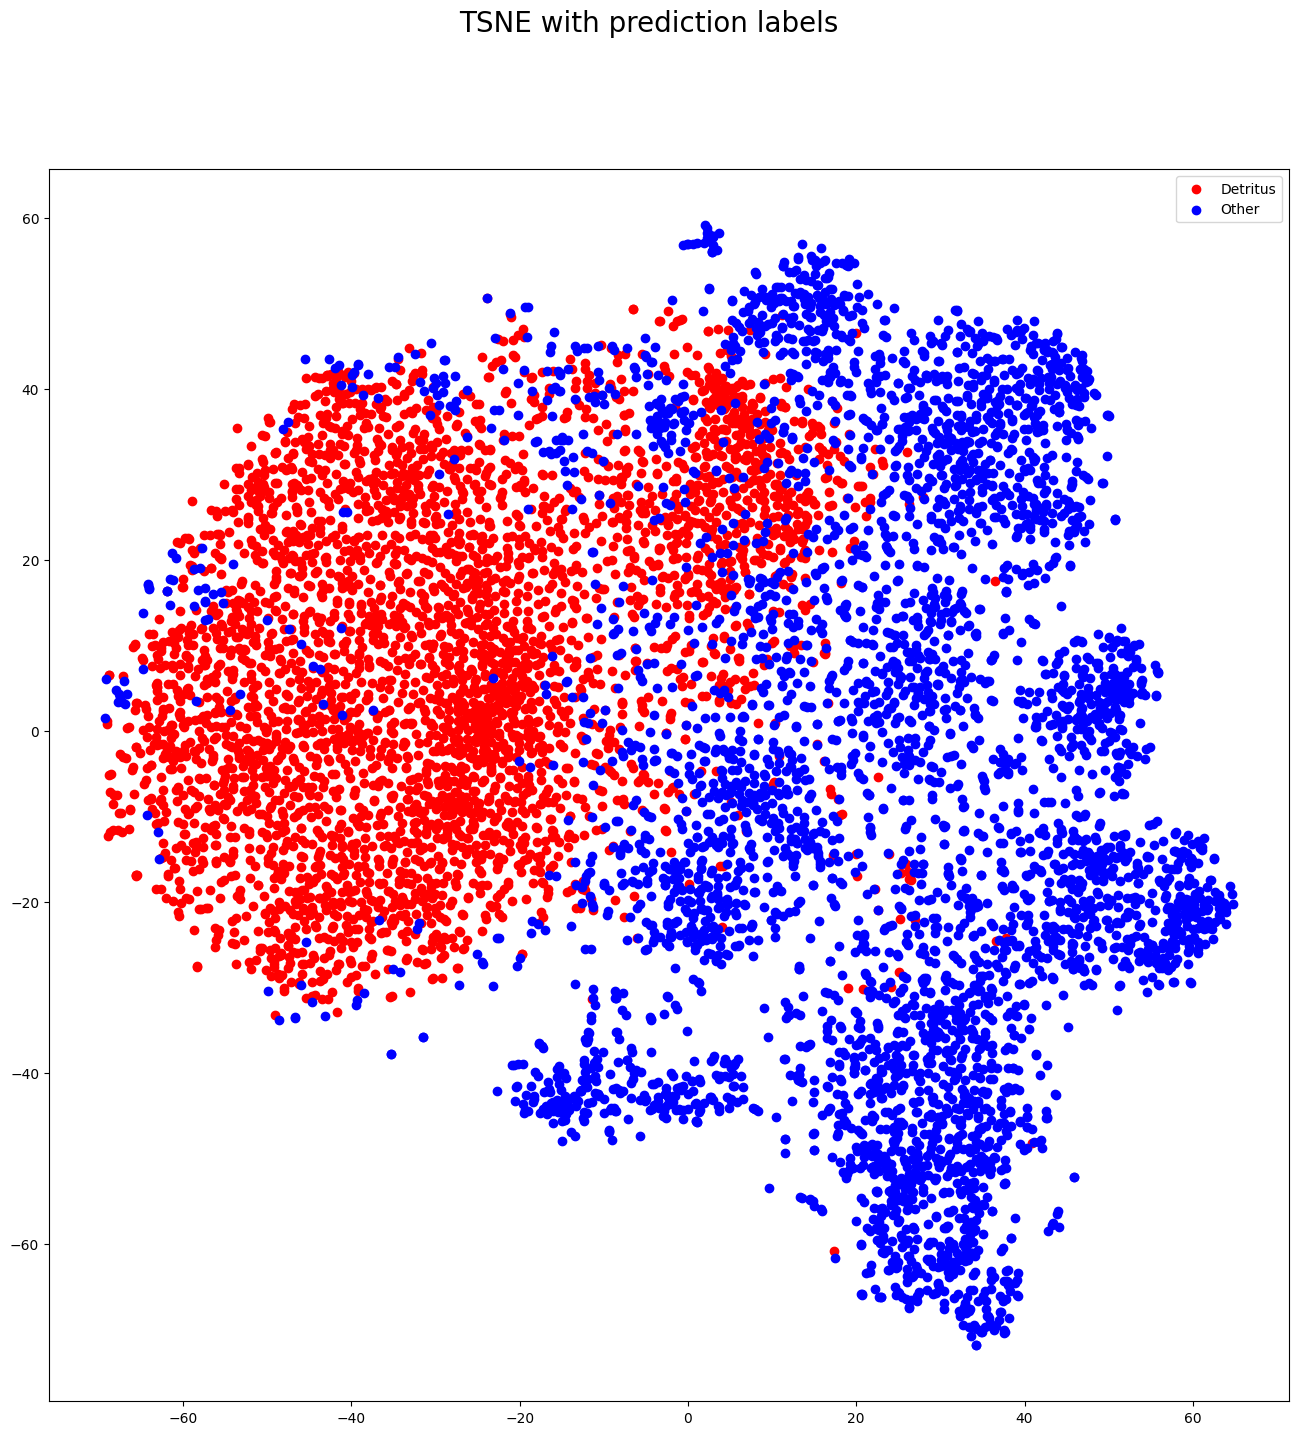

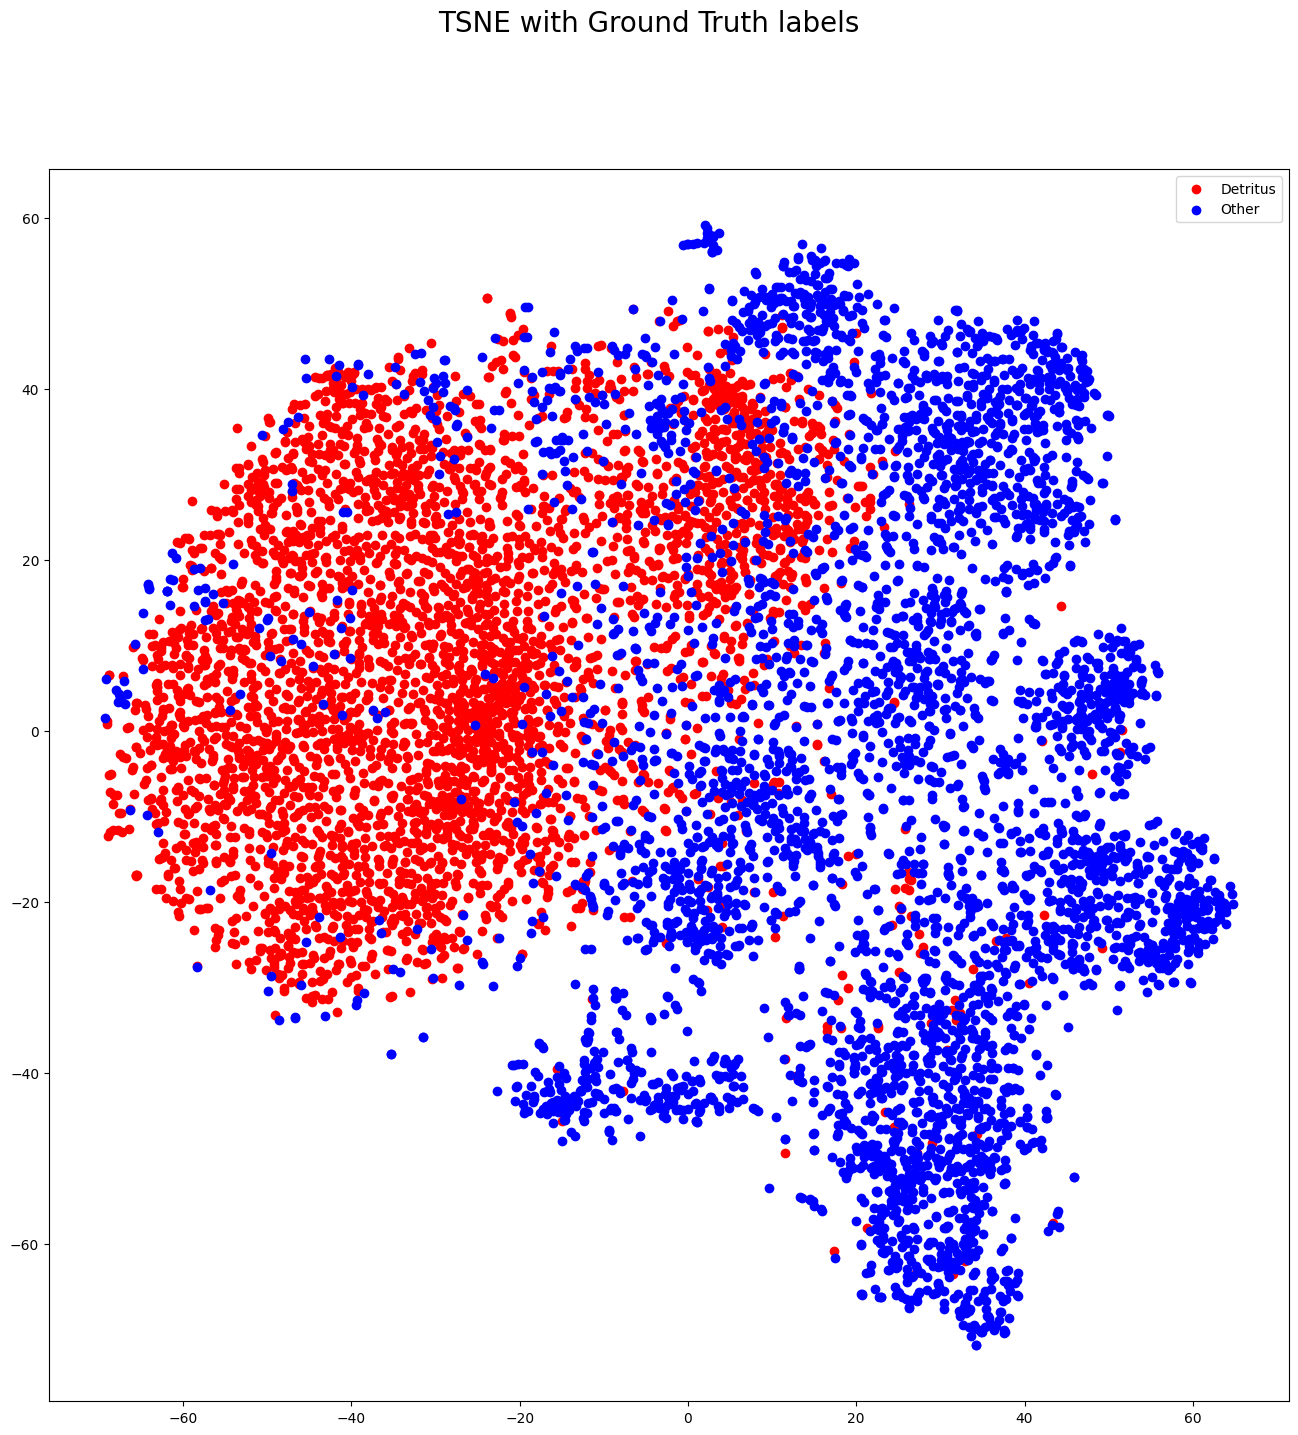

In [36]:
correct, incorrect, dense_correct_files, dense_incorrect_files, dense_prob = show_confusion_matrix(dense_model, validation_data_generator)
dense_tsne_map = get_tsne_coordinates(dense_model, validation_dataset, 2500)

Detritus 3543 273 3816 0.9284591194968553
Other 4209 201 4410 0.954421768707483
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 8226 samples in 0.001s...
[t-SNE] Computed neighbors for 8226 samples in 0.420s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8226
[t-SNE] Computed conditional probabilities for sample 2000 / 8226
[t-SNE] Computed conditional probabilities for sample 3000 / 8226
[t-SNE] Computed conditional probabilities for sample 4000 / 8226
[t-SNE] Computed conditional probabilities for sample 5000 / 8226
[t-SNE] Computed conditional probabilities for sample 6000 / 8226
[t-SNE] Computed conditional probabilities for sample 7000 / 8226
[t-SNE] Computed conditional probabilities for sample 8000 / 8226
[t-SNE] Computed conditional probabilities for sample 8226 / 8226
[t-SNE] Mean sigma: 2.244842
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.119942
[t-SNE] KL divergence after 2500 iterations: 1.758756


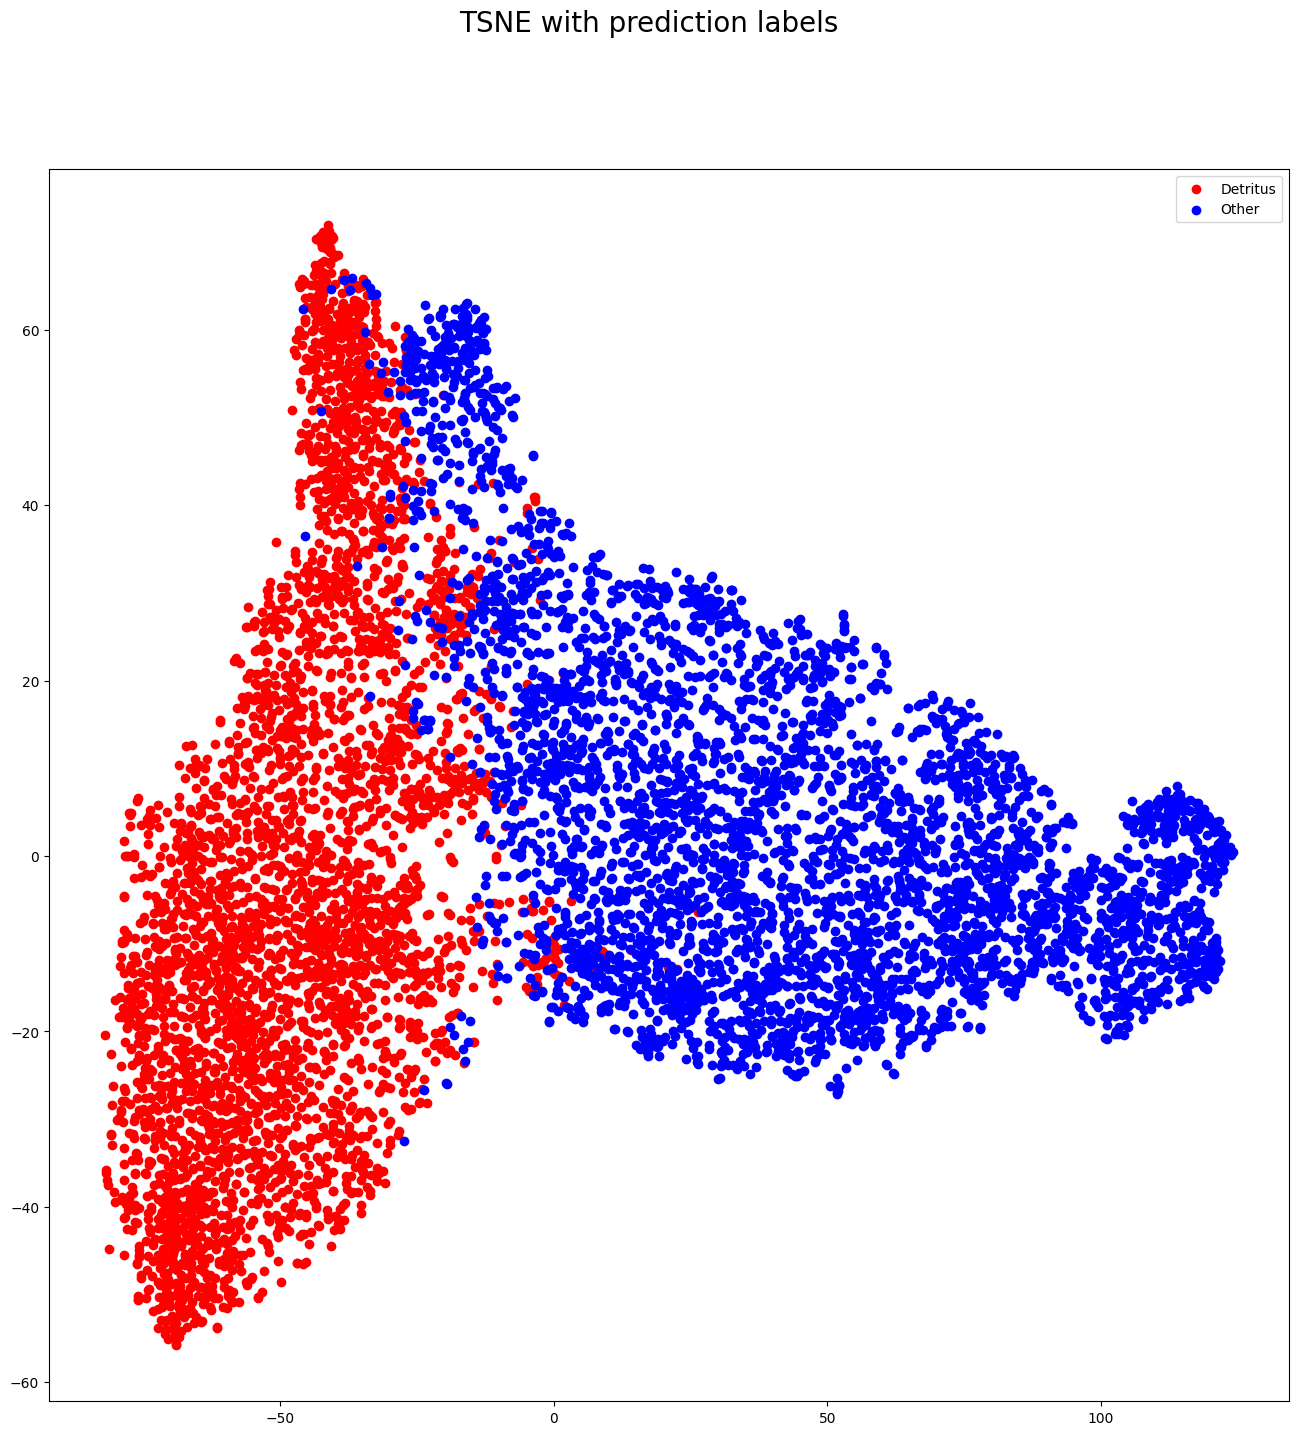

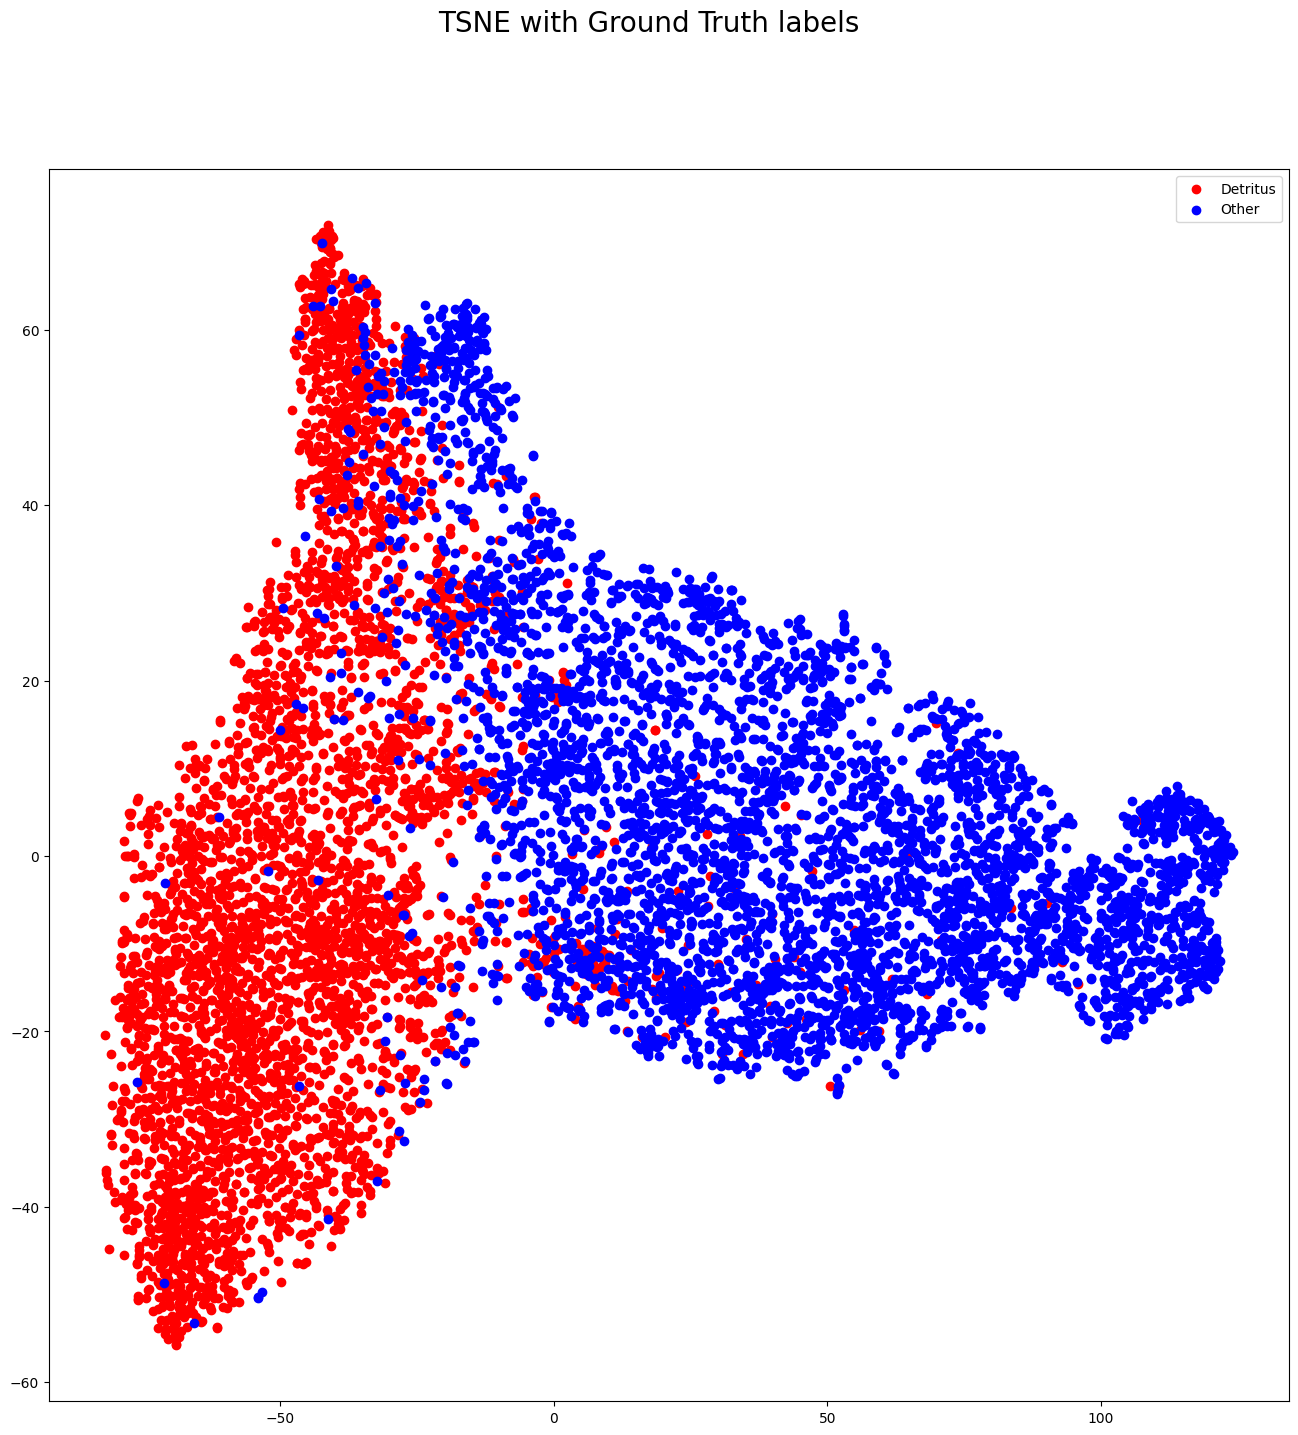

In [37]:
correct, incorrect, modelB_correct_files, modelB_incorrect_files, modelB_prob = show_confusion_matrix(model_B, validation_data_generator)
model_B_tsne_map = get_tsne_coordinates(model_B, validation_dataset, 2500)

Detritus 3540 276 3816 0.9276729559748428
Other 4161 249 4410 0.9435374149659864
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 8226 samples in 0.008s...
[t-SNE] Computed neighbors for 8226 samples in 1.862s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8226
[t-SNE] Computed conditional probabilities for sample 2000 / 8226
[t-SNE] Computed conditional probabilities for sample 3000 / 8226
[t-SNE] Computed conditional probabilities for sample 4000 / 8226
[t-SNE] Computed conditional probabilities for sample 5000 / 8226
[t-SNE] Computed conditional probabilities for sample 6000 / 8226
[t-SNE] Computed conditional probabilities for sample 7000 / 8226
[t-SNE] Computed conditional probabilities for sample 8000 / 8226
[t-SNE] Computed conditional probabilities for sample 8226 / 8226
[t-SNE] Mean sigma: 6.668588
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.144218
[t-SNE] KL divergence after 2500 iterations: 2.036039


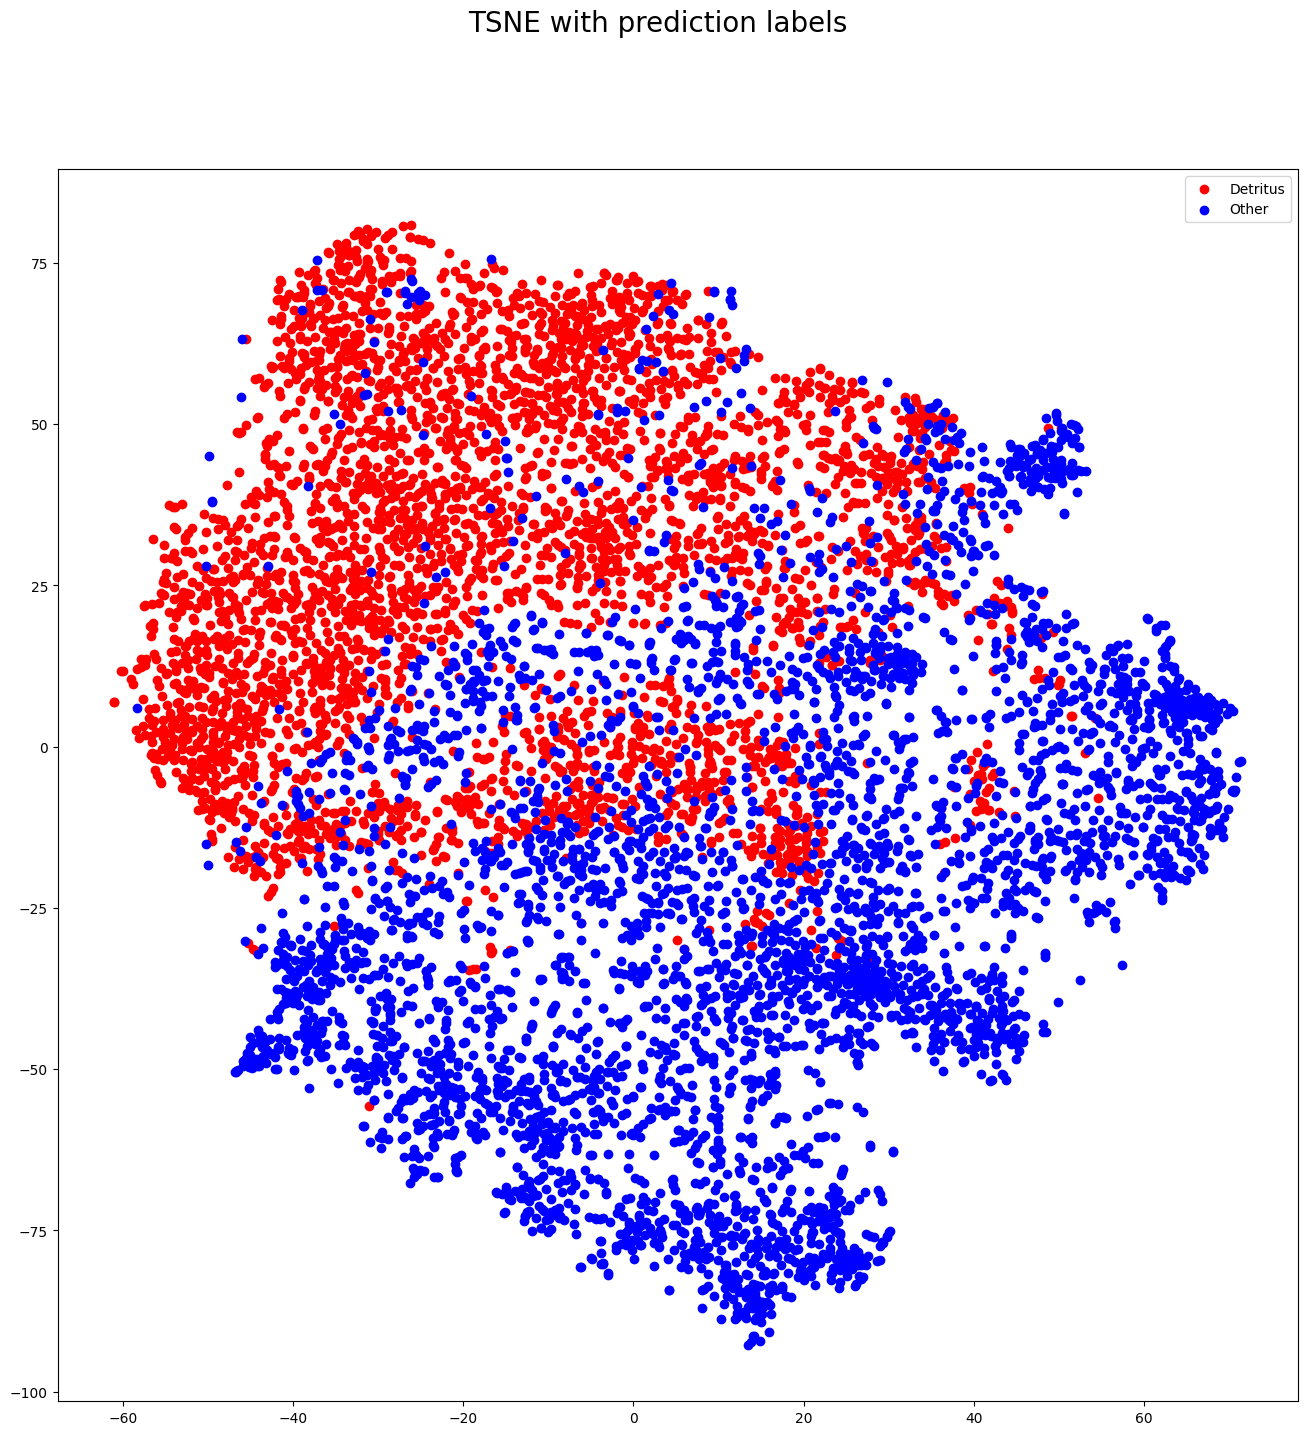

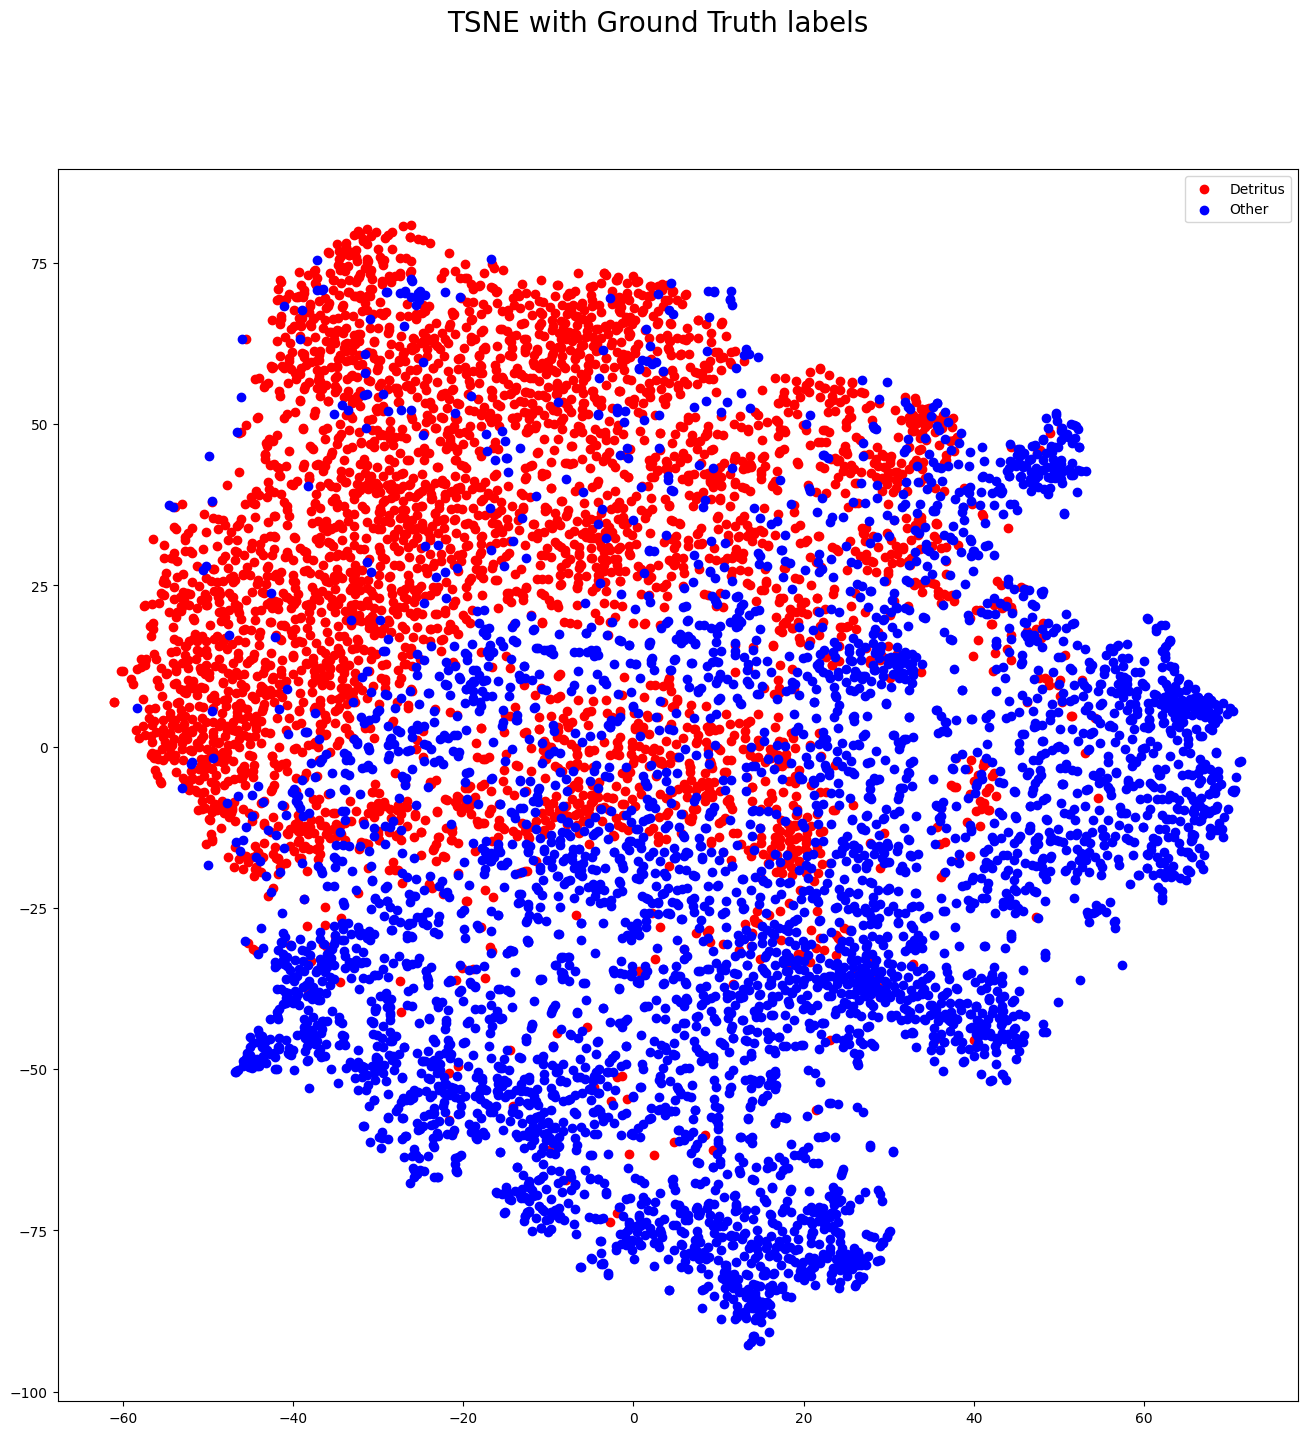

In [38]:
correct, incorrect, ir_correct_files, ir_incorrect_files, ir_prob = show_confusion_matrix(ir_model, validation_data_generator)
ir_tsne_map = get_tsne_coordinates(ir_model, validation_dataset, 2500)

In [25]:
import os
from shutil import copyfile

def get_class_name(subdir):
    return subdir[subdir[:subdir.rfind("/")].rfind("/")+1:subdir.rfind('/')]

def get_file_name(subdir):
    return subdir[subdir.rfind('/')+1:]

def copy_results(files, tenancy, result):
    for file in files:
        class_name = get_class_name(file)
        file_name = get_file_name(file)
        final_dir = "Output-Mobile-train-normal/" + tenancy + "/" + class_name+"/" + result
        if not os.path.exists(os.path.join(os.getcwd(), final_dir)):
            os.makedirs(os.path.join(os.getcwd(), final_dir), exist_ok=True)
        copyfile(file, final_dir + "/"+file_name)
    
def process_results(correct_files, incorrect_files, tenancy):
    copy_results(correct_files, tenancy, "correct")
    copy_results(incorrect_files, tenancy, "incorrect")

In [40]:
incorrect_files = set()
for file in mobile_incorrect_files:
    incorrect_files.add(''.join(file))
for file in dense_incorrect_files:
    incorrect_files.add(''.join(file))
for file in modelB_incorrect_files:
    incorrect_files.add(''.join(file))
for file in ir_incorrect_files:
    incorrect_files.add(''.join(file))

In [41]:
all_files = set()
for file in mobile_incorrect_files:
    all_files.add(''.join(file))
for file in mobile_correct_files:
    all_files.add(''.join(file))

In [42]:
len(incorrect_files)

1042

In [43]:
len(all_files)

8226

In [44]:
all_wrong = []
num_bad_models = {}
for file in all_files:
    row = file + ";" + get_class_name(file)
    c = 0
    if file in modelB_incorrect_files:
        row = row + ";N"
        c = c + 1
    else:
        row = row + ";Y"

    if file in mobile_incorrect_files:
        row = row + ";N"
        c = c + 1
    else:
        row = row + ";Y"
        
    if file in dense_incorrect_files:
        row = row + ";N"
        c = c + 1
    else:
        row = row + ";Y"
        
    if file in ir_incorrect_files:
        row = row + ";N"
        c = c + 1
    else:
        row = row + ";Y"
    row = row + ";" + str(modelB_prob[file][0])
    row = row + ";" + str(mobile_prob[file][0])
    row = row + ";" + str(dense_prob[file][0])
    row = row + ";" + str(ir_prob[file][0])

    row = row + ";" + str(model_B_tsne_map[file][0])
    row = row + ";" + str(model_B_tsne_map[file][1])
    row = row + ";" + str(mobile_tsne_map[file][0])
    row = row + ";" + str(mobile_tsne_map[file][1])
    row = row + ";" + str(dense_tsne_map[file][0])
    row = row + ";" + str(dense_tsne_map[file][1])
    row = row + ";" + str(ir_tsne_map[file][0])
    row = row + ";" + str(ir_tsne_map[file][1])

    num_bad_models[file] = c
    if (c == 4):
        all_wrong.append(file)
    print(row)  

../../Detritus/Dataset-Detritus-Bubble/val/Detritus/frame_685_2017-09-30_17_56_38.342_843_405.png;Detritus;Y;Y;Y;Y;0.036367305;0.015828304;0.24793497;0.102443635;-37.63717;64.38534;-51.7003;-56.195576;-5.693136;25.856276;4.216893;9.536055
../../Detritus/Dataset-Detritus-Bubble/val/Other/frame_751_2017-09-21_19_36_53.362_195_1652.png;Other;Y;Y;Y;Y;0.99978524;0.99999654;0.98383427;0.9086505;26.597805;29.874466;27.358644;36.16009;-63.049854;-11.89791;11.631183;43.255028
../../Detritus/Dataset-Detritus-Bubble/val/Detritus/frame_634_2017-09-22_03_57_39.662_825_774.png;Detritus;Y;N;N;N;0.32067052;0.75946456;0.84525675;0.94291294;-27.356707;50.205307;-24.612831;-62.746685;-13.590229;30.25864;50.715305;14.264039
../../Detritus/Dataset-Detritus-Bubble/val/Other/frame_312_2017-09-19_01_44_17.054_790_1822.png;Other;Y;Y;Y;Y;0.8986053;0.97690976;0.9207182;0.9622072;39.17637;-13.69559;4.0456777;-60.64805;3.6144378;-43.86762;2.8090532;-31.20557
../../Detritus/Dataset-Detritus-Bubble/val/Detritus/fram

../../Detritus/Dataset-Detritus-Bubble/val/Other/frame_544_2017-09-20_23_57_16.170_752_1256.png;Other;Y;Y;Y;Y;0.9999987;0.998993;1.0;0.9999167;123.51181;0.9684951;52.30582;45.69256;61.671215;-23.046768;15.958397;-83.72866
../../Detritus/Dataset-Detritus-Bubble/val/Other/frame_386_2017-09-16_15_15_13.245_1034_653.png;Other;Y;N;Y;Y;0.63830477;0.39201352;0.9853279;0.7456918;-2.1619241;34.45974;-12.716886;-63.137993;39.3485;29.688358;25.307371;-30.08084
../../Detritus/Dataset-Detritus-Bubble/val/Detritus/frame_770_2017-09-30_00_19_26.844_903_1475.png;Detritus;Y;Y;Y;Y;0.025770403;0.26271924;0.0038546566;0.1476728;-44.74113;31.80298;-48.21216;-64.30019;-3.5317247;19.448187;-3.4021575;0.7460312
../../Detritus/Dataset-Detritus-Bubble/val/Detritus/frame_760_2017-09-29_12_04_58.884_174_458.png;Detritus;Y;Y;Y;Y;0.0018380204;4.3782195e-05;0.00024020206;0.007859012;-67.149605;-14.185676;-5.6815586;85.00646;-36.927414;19.772669;-31.870752;67.57861
../../Detritus/Dataset-Detritus-Bubble/val/Detritus/

In [41]:
len(all_wrong)

143

In [42]:
test_dataset.file_paths

['../../Detritus/Dataset-Detritus-Bubble/test/Detritus/frame_103_2017-09-19_00_19_43.344_1250_603.png',
 '../../Detritus/Dataset-Detritus-Bubble/test/Detritus/frame_103_2017-09-19_06_19_05.639_1833_155.png',
 '../../Detritus/Dataset-Detritus-Bubble/test/Detritus/frame_103_2017-09-21_11_27_13.664_1454_1731_-_Cópia.png',
 '../../Detritus/Dataset-Detritus-Bubble/test/Detritus/frame_109_2017-09-19_09_08_21.071_1956_1686.png',
 '../../Detritus/Dataset-Detritus-Bubble/test/Detritus/frame_115_2017-09-21_23_41_42.650_137_1888.png',
 '../../Detritus/Dataset-Detritus-Bubble/test/Detritus/frame_124_2017-09-20_20_25_49.768_653_1763.png',
 '../../Detritus/Dataset-Detritus-Bubble/test/Detritus/frame_124_2017-09-21_18_18_59.744_946_46.png',
 '../../Detritus/Dataset-Detritus-Bubble/test/Detritus/frame_126_2017-09-19_05_57_56.992_0_1650.png',
 '../../Detritus/Dataset-Detritus-Bubble/test/Detritus/frame_13_2017-09-22_06_00_04.648_984_1733.png',
 '../../Detritus/Dataset-Detritus-Bubble/test/Detritus/fram

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 8227 samples in 2.252s...
[t-SNE] Computed neighbors for 8227 samples in 84.130s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8227
[t-SNE] Computed conditional probabilities for sample 2000 / 8227
[t-SNE] Computed conditional probabilities for sample 3000 / 8227
[t-SNE] Computed conditional probabilities for sample 4000 / 8227
[t-SNE] Computed conditional probabilities for sample 5000 / 8227
[t-SNE] Computed conditional probabilities for sample 6000 / 8227
[t-SNE] Computed conditional probabilities for sample 7000 / 8227
[t-SNE] Computed conditional probabilities for sample 8000 / 8227
[t-SNE] Computed conditional probabilities for sample 8227 / 8227
[t-SNE] Mean sigma: 0.757674
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.812805
[t-SNE] KL divergence after 2500 iterations: 1.329023


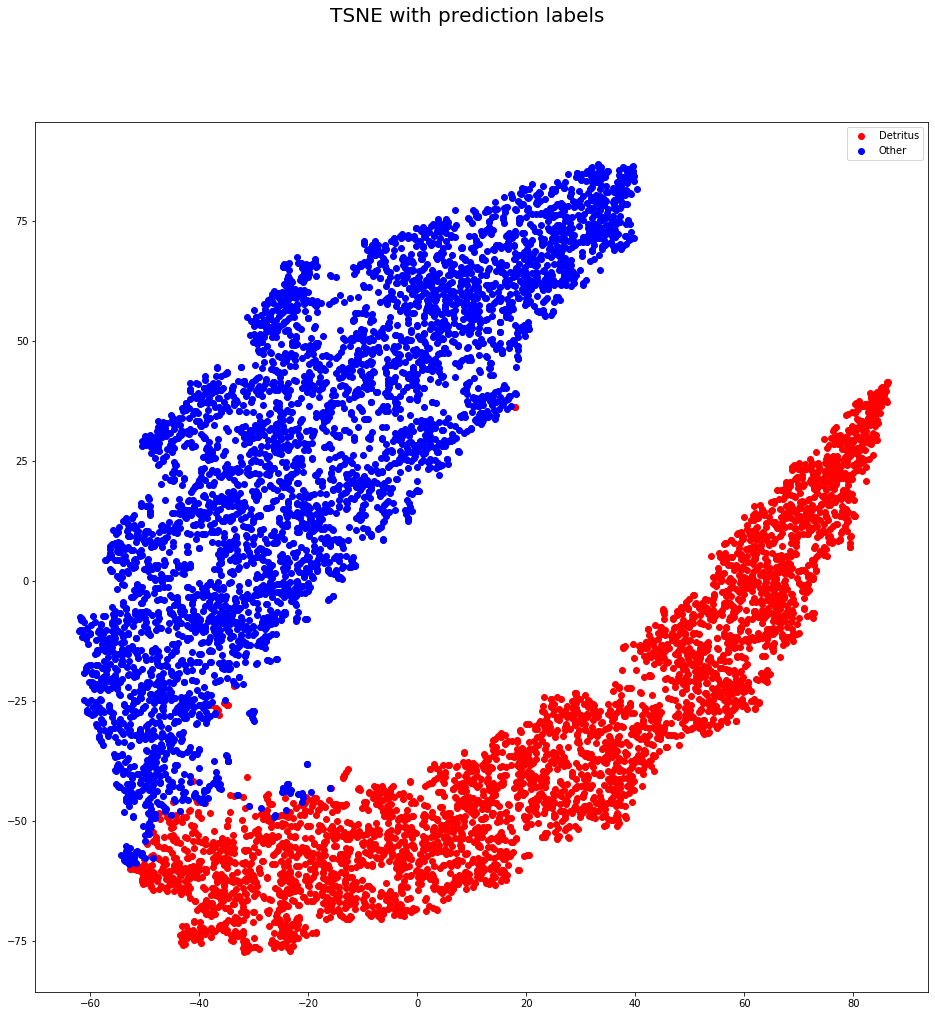

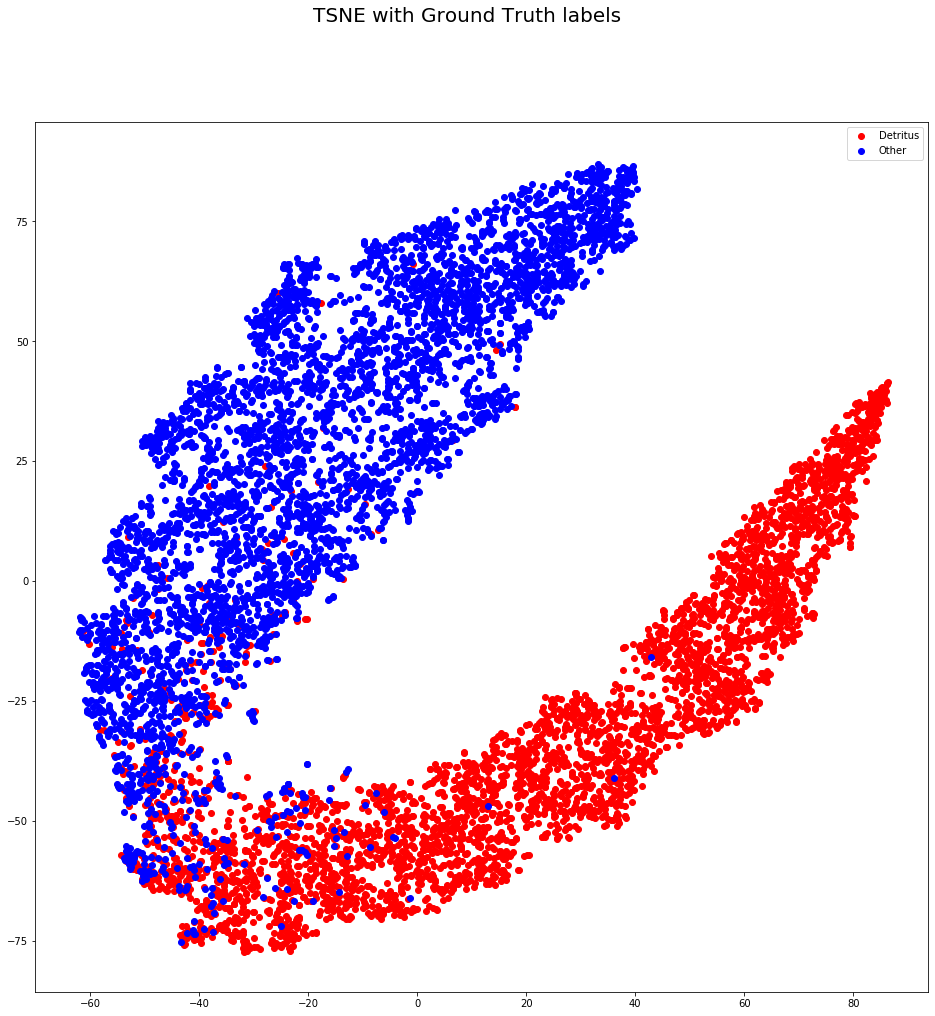

In [43]:
file_path = get_tsne_coordinates(mobileNetModelSc, test_dataset, 2500)

In [83]:
def print_new_tsne_results(model, dataset, tx_map):
    new_ds = dataset
    
    x_dataset = []
    y_dataset = []
    
    for x, y in new_ds:
        x_dataset.append(x)
        y_dataset.append(y)
    
    
    small_dataset = np.concatenate(x_dataset)
    y_dataset = np.concatenate(y_dataset)
    
    results = model.predict(small_dataset)
    scores = tf.nn.sigmoid(results)
    labels = tf.where(scores < 0.5, 0, 1)
    
    colors = ['red', 'blue']
    classes = dataset.class_names
    filenames = dataset.file_paths
    file_path = {}
    
    model2 = tf.keras.Model(inputs=model.input, outputs=model.layers[-2].output)
    features = model2.predict(small_dataset)
    
    tx = [tx_map[f][0] for f in filenames]
    ty = [tx_map[f][1] for f in filenames]

    
    i = 0
    for f in filenames:
        file_path[f] = (tx[i], ty[i])
        i = i + 1
    fig2 = plt.figure(figsize=(16,16))
    fig2.suptitle('TSNE with prediction labels', fontsize=20)
    ax2 = fig2.add_subplot(111)
    for idx, c in enumerate(colors):
        indices = [i for i, l in enumerate(labels) if idx == l]
        current_tx = np.take(tx, indices)
        current_ty = np.take(ty, indices)
        ax2.scatter(current_tx, current_ty, c=c, label=classes[idx])
    
    ax2.legend(loc='best')
   
    fig = plt.figure(figsize=(16,16))
    fig.suptitle('TSNE with Ground Truth labels', fontsize=20)
    ax = fig.add_subplot(111)
    for idx, c in enumerate(colors):
        indices = [i for i, l in enumerate(y_dataset) if idx == l]
        current_tx = np.take(tx, indices)
        current_ty = np.take(ty, indices)
        ax.scatter(current_tx, current_ty, c=c, label=classes[idx])
    
    ax.legend(loc='best')
    
    fig = px.scatter(x=tx, y=ty, color=np.asarray(labels)[:, 0])
    fig.show()

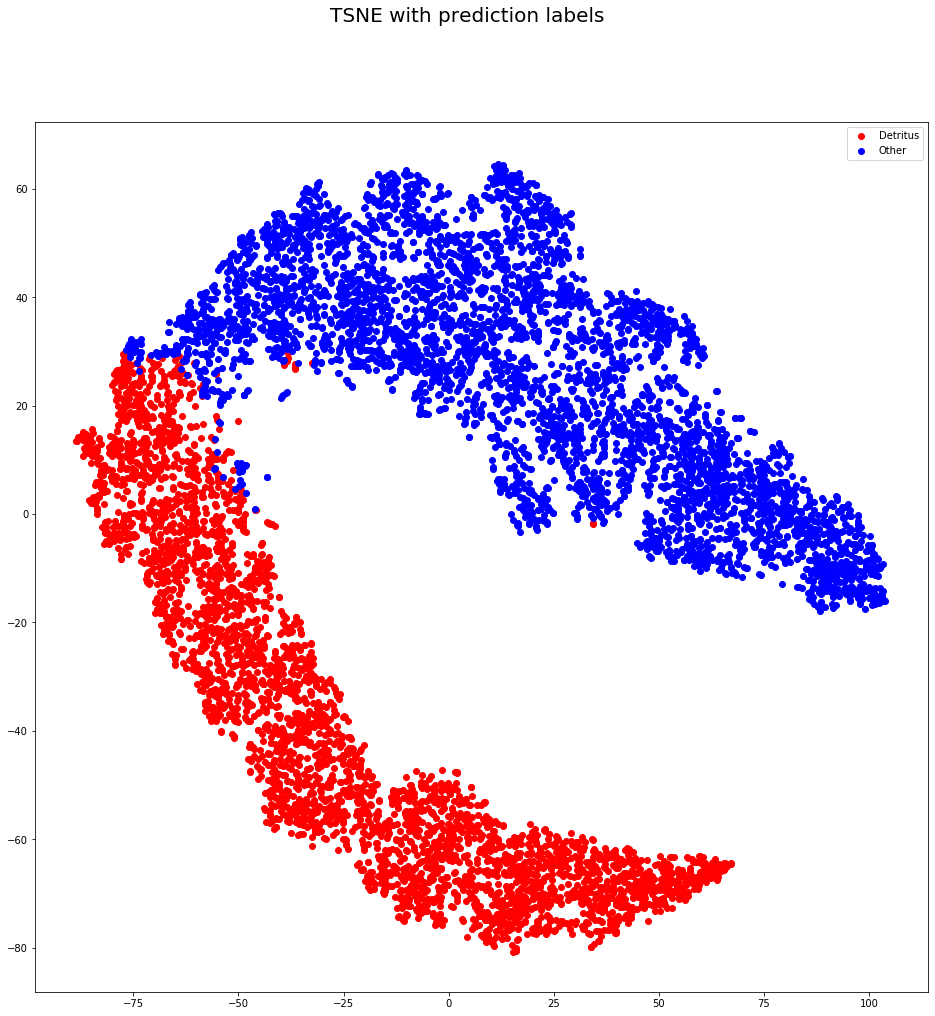

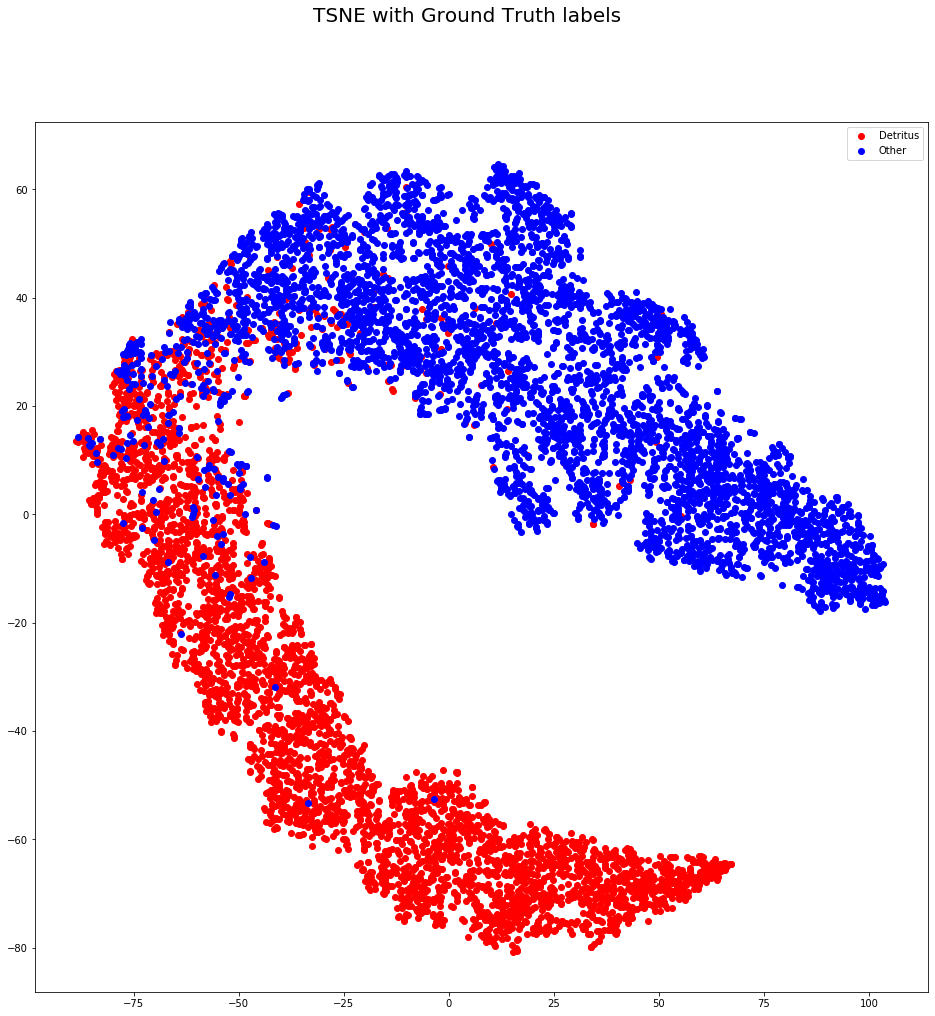

In [84]:
print_new_tsne_results(mobileNetModelSc, test_dataset, mobile_tsne_map)

In [45]:
# x and y given as array_like objects
import numpy
import pandas

import plotly.express as px
fig = px.scatter(x=[0, 1, 2, 3, 4], y=[0, 1, 4, 9, 16], color=[0,0,1,0,1])
fig.show()

ModuleNotFoundError: No module named 'pandas'

In [79]:
filenames = test_dataset.file_paths
tx = [mobile_tsne_map[f][0] for f in filenames]
ty = [mobile_tsne_map[f][1] for f in filenames]

In [86]:
classes = [get_class_name(x) for x in filenames]

In [103]:
color_array = []
for f in filenames:
    if get_class_name(f) == "Detritus":
        color_array.append("Detritus with {0} errors".format(num_bad_models[f]))
    else:
        color_array.append("Plankton with {0} errors".format(num_bad_models[f]))

In [80]:
x_dataset = []
y_dataset = []
    
for x, y in test_dataset:
    x_dataset.append(x)
    y_dataset.append(y)
    
    
small_dataset = np.concatenate(x_dataset)
y_dataset = np.concatenate(y_dataset)

In [81]:
results = mobileNetModelSc.predict(small_dataset)
scores = tf.nn.sigmoid(results)
labels = tf.where(scores < 0.5, 0, 1)

In [75]:
np.asarray(labels)[:, 0]

array([1, 1, 0, ..., 1, 1, 1], dtype=int32)

In [116]:
color_discrete_map={
    "Detritus with 4 errors": '#660000',
    "Detritus with 3 errors": '#FF8000',
    "Detritus with 2 errors": '#FF0000',
    "Detritus with 1 errors": '#FF6666',
    "Detritus with 0 errors": '#FF9999',
    
    "Plankton with 4 errors": '#0A0A0A',
    "Plankton with 3 errors": '#08169A',
    "Plankton with 2 errors": '#1629D8',
    "Plankton with 1 errors": '#707DF3',
    "Plankton with 0 errors": '#CCCCFF',
}

In [117]:
fig = px.scatter(x=tx, y=ty, color=color_array, color_discrete_map=color_discrete_map)
fig.show()

In [47]:
import pandas

In [21]:
print(pandas.__version__)

1.0.1


In [22]:
!pip install plotly

  Using cached plotly-5.12.0-py2.py3-none-any.whl (15.2 MB)
  Using cached tenacity-8.1.0-py3-none-any.whl (23 kB)
